In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [2]:
#Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno




## Data Extraction

In [3]:
#Extracting required data from the data sources

app_rec_df = pd.read_csv("../input/credit-card-approval-prediction/application_record.csv")
credit_rec_df = pd.read_csv("../input/credit-card-approval-prediction/credit_record.csv")

## Exploratory Data Analysis

In [4]:
# Examining the application record data

app_rec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
# Examining the application record data

credit_rec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
#Examining the distinct values for ID in application

app_rec_df['ID'].nunique() 

438510

*  The total rows in application data for the attribute 'ID'are 438,557. 
*  But when looked for the number of unique values for that column, we got 438,510.
*  This means it has duplicate values for ID

In [7]:
#Examining the distinct values for ID in credit record

credit_rec_df['ID'].nunique() 

45985

* The credit record data has 45985 unique rows.
* Even though the total records are as there are repeating entries for column 'ID' are 1,048,575, it is across different months and status.


<Axes: >

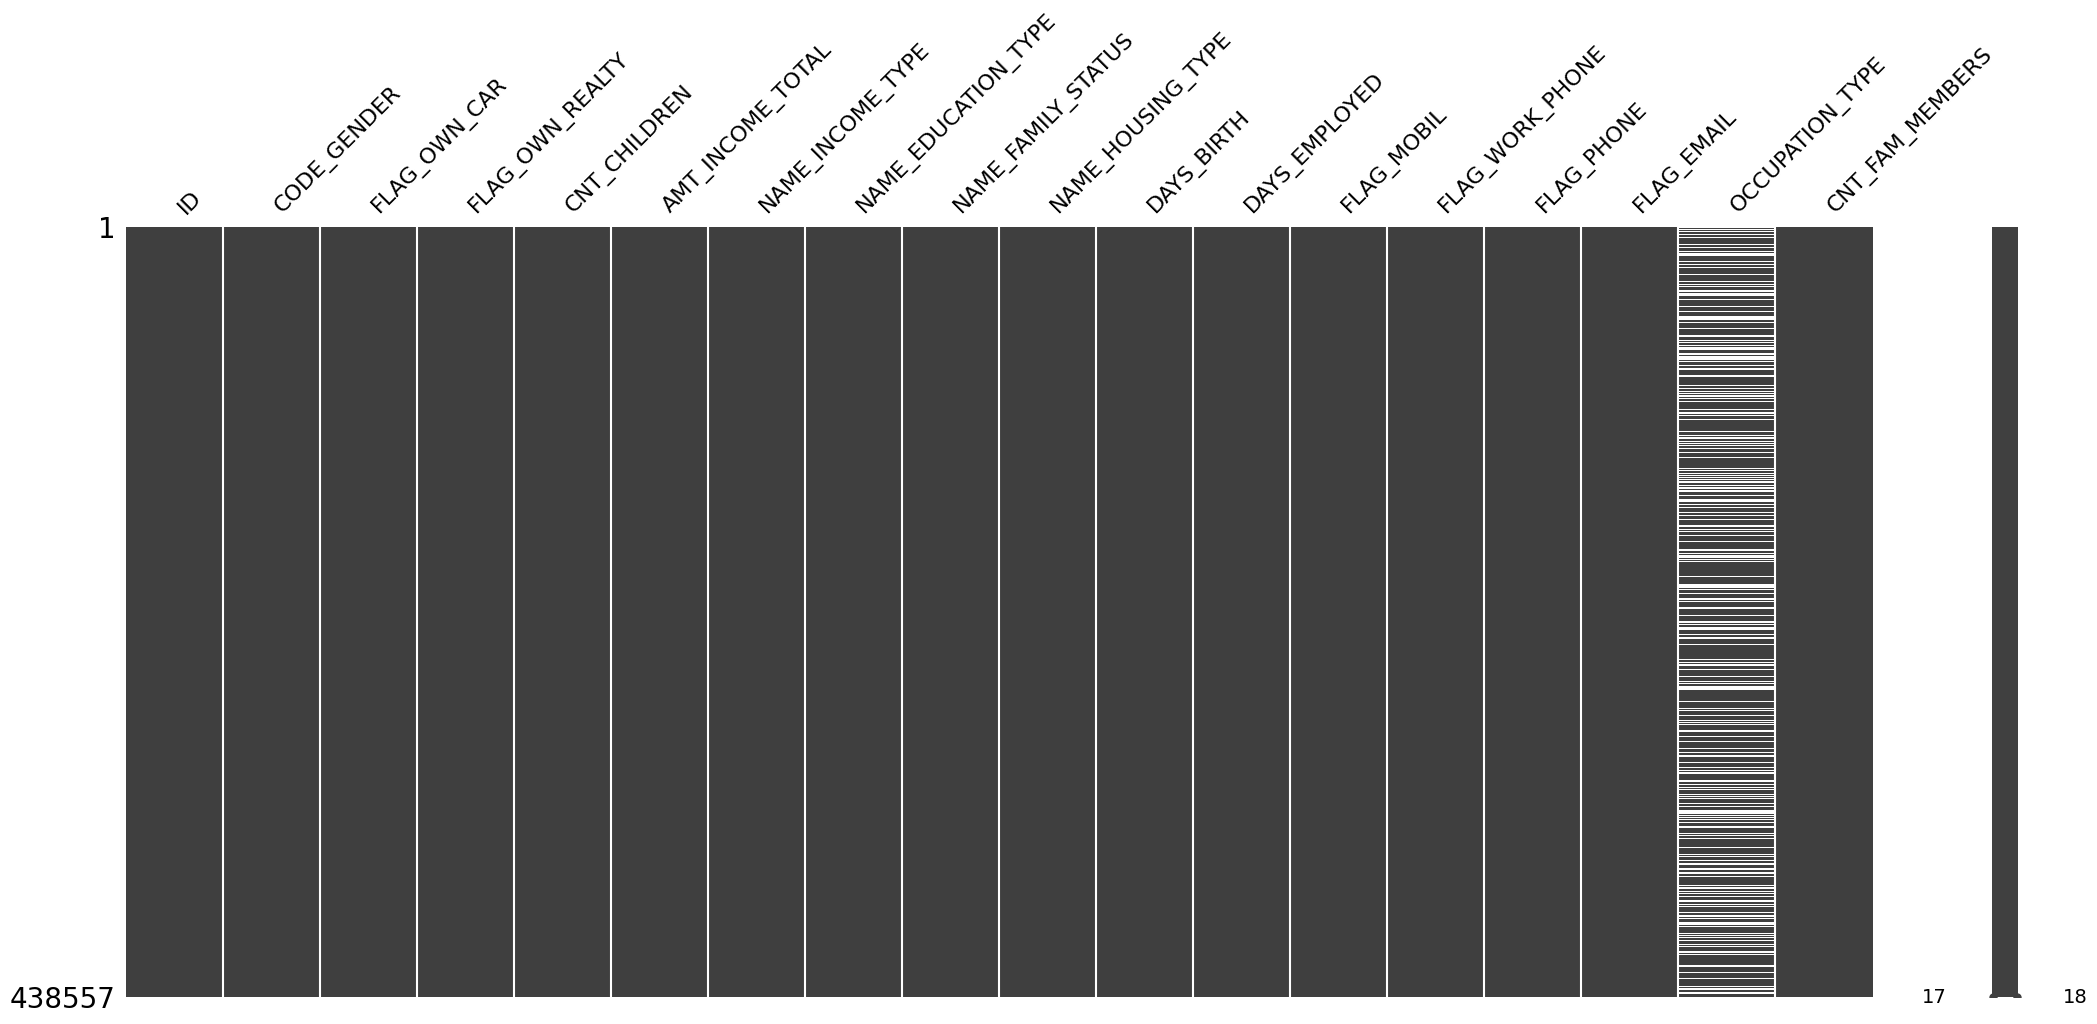

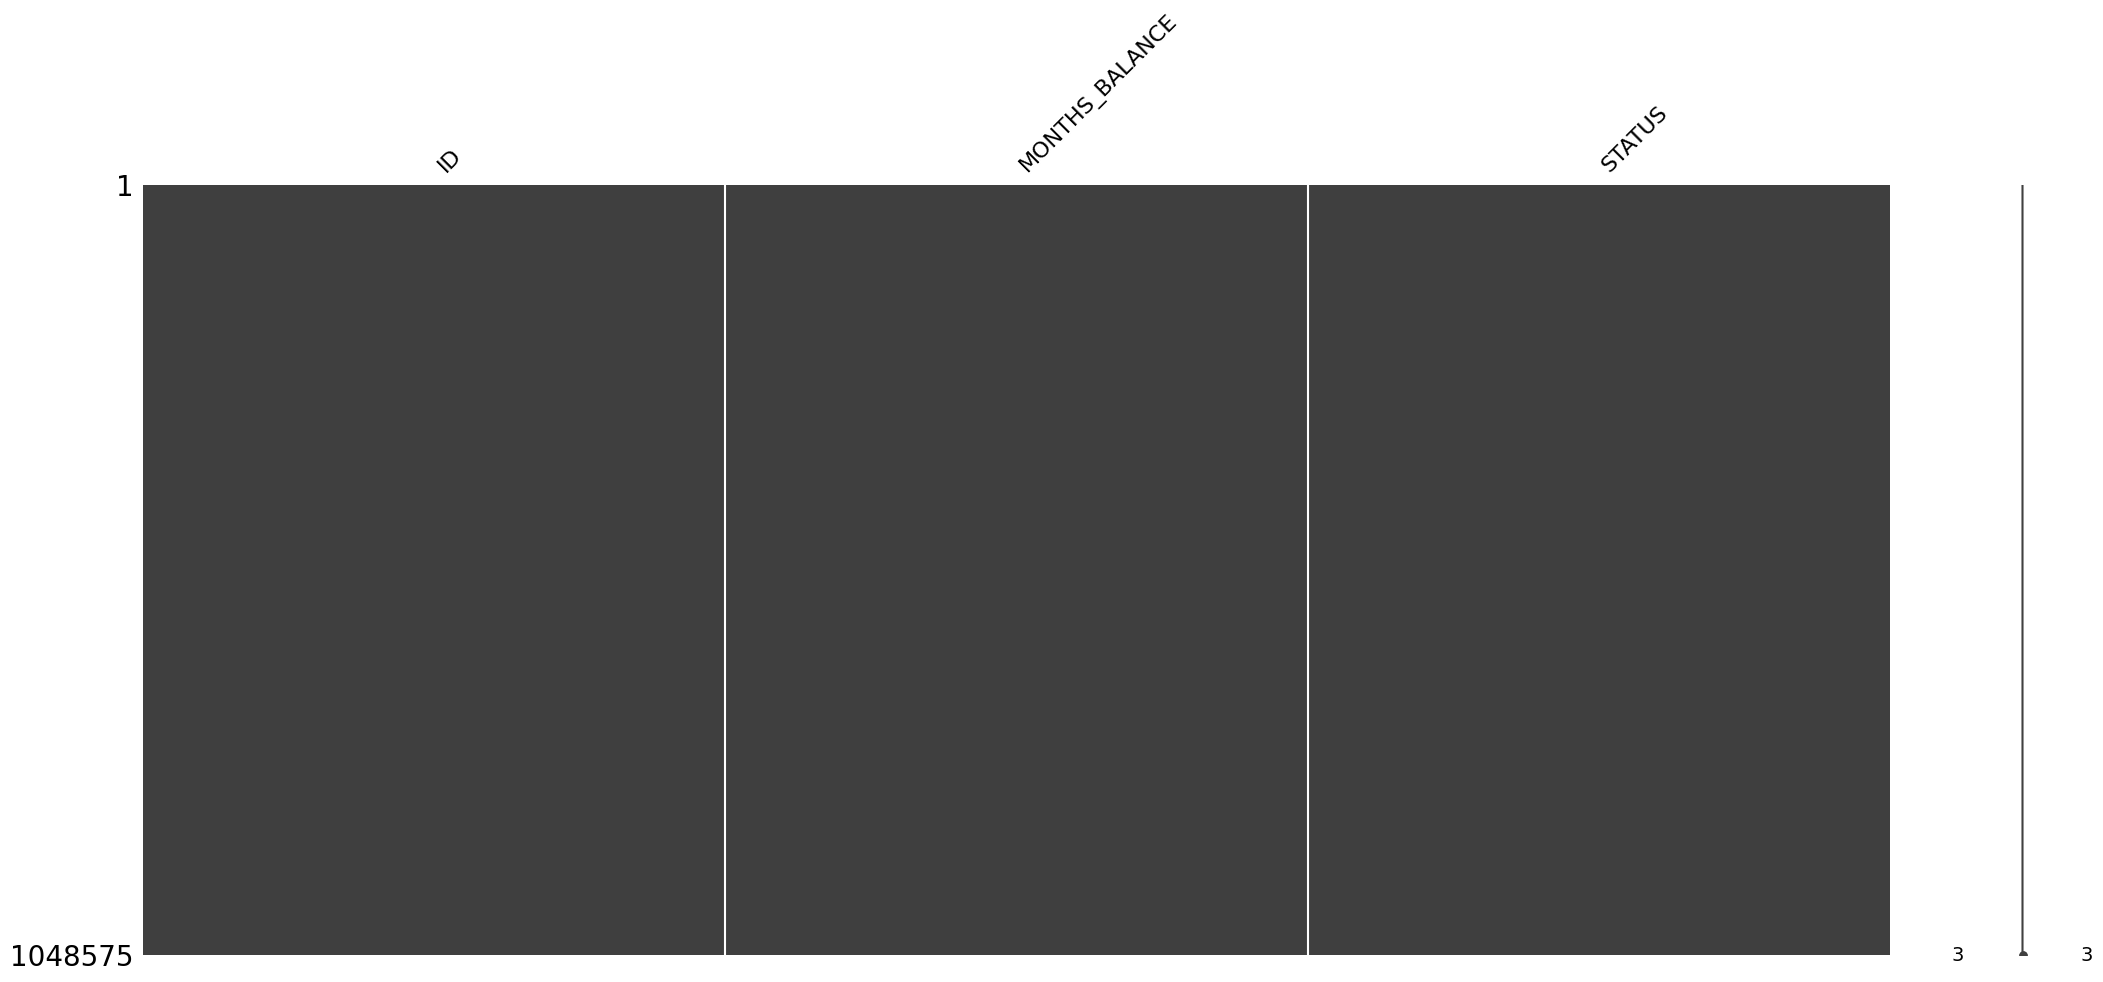

In [8]:
msno.matrix(app_rec_df)
msno.matrix(credit_rec_df)

* We can clearly see that the plot gives a visual representation of missing values as white spaces in a grid, allowing you to see patterns of missingness across rows and columns.
* The attribute occupation_type has many null values
* Let's delete those duplicates and will keep the latest value of ID.
* Also, lets drop the column column 'occuaption_type' as it has many missing values.
* It is also better to filter the columns that have non numeric values and check whether they are really useful.


In [9]:
app_rec_df = app_rec_df.drop_duplicates('ID', keep='last') 

In [10]:
app_rec_df.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [11]:
obj = pd.DataFrame(app_rec_df.dtypes =='object').reset_index()
object_type = obj[obj[0] == True]['index']
object_type


1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [12]:
#Creating the non numeric value to numeric values as I think all the categories are equally important and is hard to oversee any

numeric_type = pd.DataFrame(app_rec_df.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
numeric_type = numeric_type[numeric_type['yes/no'] ==True]['index']

print(app_rec_df[object_type]['CODE_GENDER'].value_counts(),"\n",
app_rec_df[object_type]['FLAG_OWN_CAR'].value_counts(),"\n",
app_rec_df[object_type]['FLAG_OWN_REALTY'].value_counts(),"\n",
app_rec_df[object_type]['NAME_INCOME_TYPE'].value_counts(),"\n",
app_rec_df[object_type]['NAME_EDUCATION_TYPE'].value_counts(),"\n",
app_rec_df[object_type]['NAME_FAMILY_STATUS'].value_counts(),"\n",
app_rec_df[object_type]['NAME_HOUSING_TYPE'].value_counts())

CODE_GENDER
F    294412
M    144098
Name: count, dtype: int64 
 FLAG_OWN_CAR
N    275428
Y    163082
Name: count, dtype: int64 
 FLAG_OWN_REALTY
Y    304043
N    134467
Name: count, dtype: int64 
 NAME_INCOME_TYPE
Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: count, dtype: int64 
 NAME_EDUCATION_TYPE
Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64 
 NAME_FAMILY_STATUS
Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: count, dtype: int64 
 NAME_HOUSING_TYPE
House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartmen

In [13]:
# Appling 0,1 classification to different value types.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app_rec_df:
    if app_rec_df[x].dtypes=='object':
        app_rec_df[x] = le.fit_transform(app_rec_df[x])

app_rec_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


<Axes: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

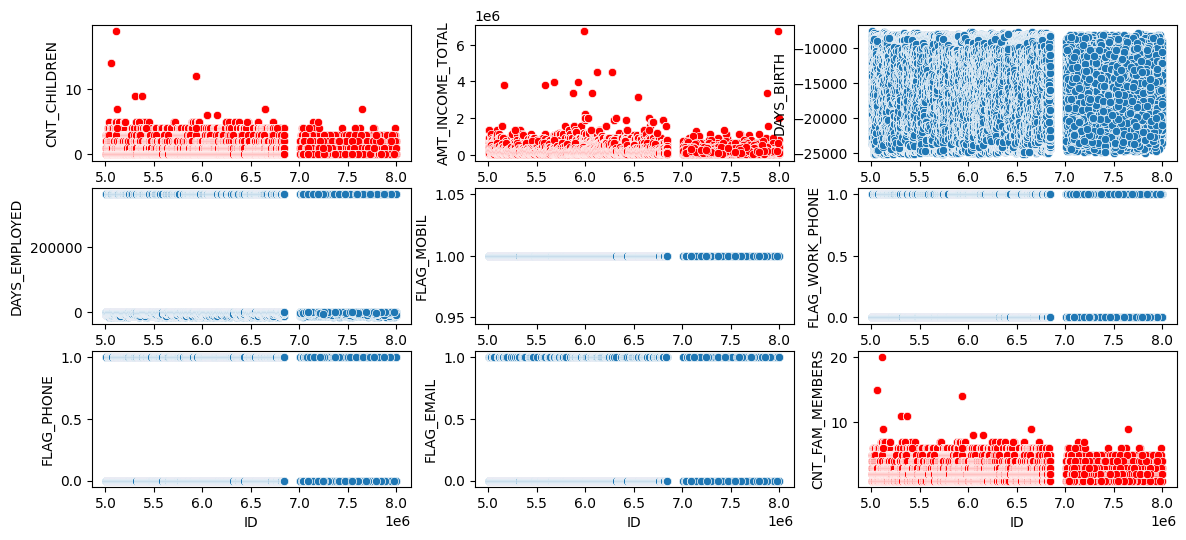

In [14]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app_rec_df, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app_rec_df, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app_rec_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app_rec_df, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app_rec_df, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app_rec_df, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app_rec_df, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app_rec_df, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app_rec_df, ax=ax[2][2], color= 'red')

We can clearly see outliers in the following columns.So,we need to remove these outliers to make sure they do not affect our model results.

1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS

In [15]:
# CNT_CHILDREN 
qtl_high = app_rec_df ['CNT_CHILDREN'].quantile(0.999)
qtl_low = app_rec_df ['CNT_CHILDREN'].quantile(0.001)
app_rec_df = app_rec_df [(app_rec_df ['CNT_CHILDREN']>qtl_low) & (app_rec_df ['CNT_CHILDREN']<qtl_high)]

# AMT_INCOME_TOTAL 
qtl_high = app_rec_df ['AMT_INCOME_TOTAL'].quantile(0.999)
qtl_low = app_rec_df ['AMT_INCOME_TOTAL'].quantile(0.001)
app_rec_df = app_rec_df [(app_rec_df ['AMT_INCOME_TOTAL']>qtl_low) & (app_rec_df ['AMT_INCOME_TOTAL']<qtl_high)]

# CNT_FAM_MEMBERS
qtl_high = app_rec_df ['CNT_FAM_MEMBERS'].quantile(0.999)
qtl_low = app_rec_df ['CNT_FAM_MEMBERS'].quantile(0.001)
app_rec_df = app_rec_df [(app_rec_df ['CNT_FAM_MEMBERS']>qtl_low) & (app_rec_df ['CNT_FAM_MEMBERS']<qtl_high)]

<Axes: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

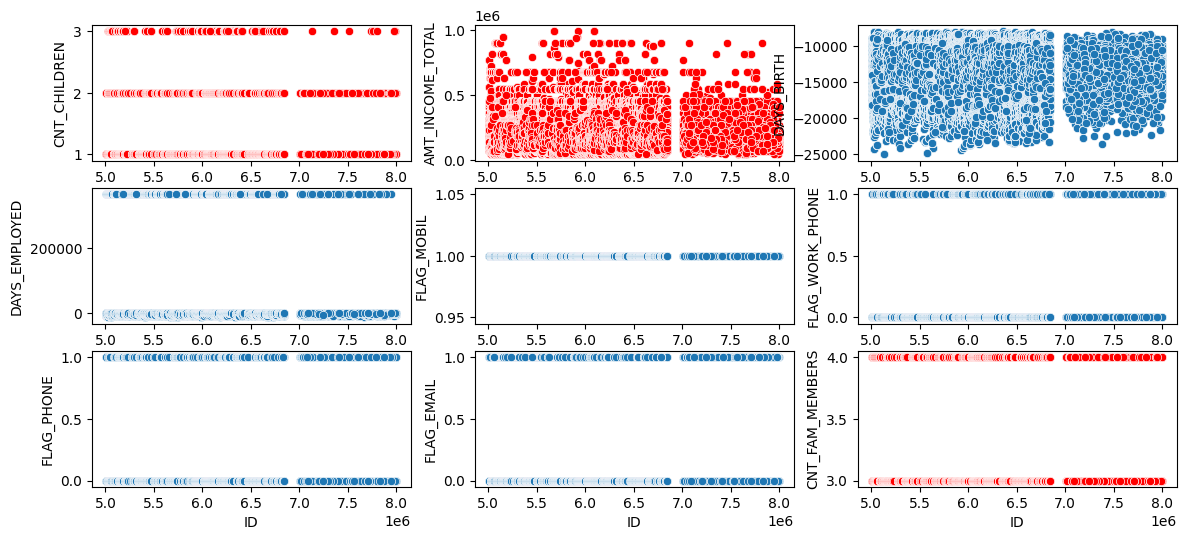

In [16]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app_rec_df, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app_rec_df, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app_rec_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app_rec_df, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app_rec_df, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app_rec_df, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app_rec_df, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app_rec_df, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app_rec_df, ax=ax[2][2], color= 'red')

In [17]:
#Sorting the credit record data according to ID from the latest months

credit_rec_df['Months from today'] = credit_rec_df['MONTHS_BALANCE']*-1
credit_rec_df = credit_rec_df.sort_values(['ID','Months from today'], ascending=True)
credit_rec_df.head(10)

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [18]:
credit_rec_df['STATUS'].value_counts() 

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [19]:
credit_rec_df = credit_rec_df.replace({'STATUS': {'C': 0, 'X': 0}})

In [20]:
# Convert 'STATUS' to numeric, coercing errors to NaN
credit_rec_df['STATUS'] = pd.to_numeric(credit_rec_df['STATUS'], errors='coerce')

# Handle NaN values by filling them with 0 (or another appropriate value) and convert to integer type
credit_rec_df['STATUS'] = credit_rec_df['STATUS'].fillna(0).astype(int)

# Classify values >= 2 as 1, else 0 using a vectorized condition
credit_rec_df['STATUS'] = (credit_rec_df['STATUS'] >= 2).astype(int)

In [21]:

# Get normalized value counts
normalized_counts = credit_rec_df['STATUS'].value_counts(normalize=True)


In [22]:
normalized_counts

STATUS
0    0.99704
1    0.00296
Name: proportion, dtype: float64

### The dataset is highly imbalanced (0: 99%, 1: 1%). We will address this oversampling issue after merging both datasets by first joining them.


In [23]:
 credit_group=credit_rec_df.groupby('ID').agg(max).reset_index()
 credit_group.head()

/tmp/ipykernel_17/1441814014.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  credit_group=credit_rec_df.groupby('ID').agg(max).reset_index()


,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [24]:
df = app_rec_df.join(credit_group.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9516 entries, 29 to 434805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  FLAG_MOBIL           9516 non-null   int64  
 13  FLAG_WORK_PHONE      9516 non-null   int64  
 14  FLAG_PHONE           9516 non-null   int64  
 15  FLAG_EMAIL           9516 non-null   int

In [26]:
X = df.iloc[:,1:-1] # Storing all the variables except labels in X
y = df.iloc[:,-1] # Storing all the labels in y

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [29]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [30]:
y_train.value_counts()

STATUS
0    6549
1     112
Name: count, dtype: int64

In [31]:
y_balanced.value_counts()

STATUS
0    6549
1    6549
Name: count, dtype: int64

In [32]:
y_test.value_counts()

STATUS
0    2816
1      39
Name: count, dtype: int64

In [33]:
y_test_balanced.value_counts()

STATUS
0    2816
1    2816
Name: count, dtype: int64


# As the data is balanced , now we will use this data to train different models


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [35]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [36]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)


results = [(key, train, test) for key, train, test in zip(classifiers.keys(), train_scores, test_scores)]


sorted_results = sorted(results, key=lambda x: x[2], reverse=True)


for classifier_name, train_score, test_score in sorted_results:
    print(f"{classifier_name}: Train Score = {train_score:.2f}, Test Score = {test_score:.2f}")


XGBoost: Train Score = 0.99, Test Score = 0.90
RandomForest: Train Score = 0.99, Test Score = 0.80
DecisionTree: Train Score = 0.99, Test Score = 0.79
SVC: Train Score = 0.93, Test Score = 0.73
KNeighbors: Train Score = 0.95, Test Score = 0.69
LogisticRegression: Train Score = 0.61, Test Score = 0.57


Analysis:

XGBoost (Train Score = 0.99, Test Score = 0.92)

The model performs well on both training and test data, suggesting good generalization.
There's a slight drop in the test score, which is expected and indicates some generalization error, but it's minimal.

DecisionTree (Train Score = 1.00, Test Score = 0.83)

The training score is perfect, indicating overfitting (memorizing the training data).
The test score is significantly lower than the training score, showing that the model does not generalize well to unseen data.

RandomForest (Train Score = 1.00, Test Score = 0.81)

Similar to DecisionTree, the model perfectly fits the training data but shows signs of overfitting.
Although the test score is a bit better than DecisionTree, it's still considerably lower, indicating limited generalization.

SVC (Train Score = 0.93, Test Score = 0.77)

The model fits the training data fairly well, but the gap between the training and test scores suggests some overfitting.
It doesn’t generalize as well as XGBoost.

KNeighbors (Train Score = 0.98, Test Score = 0.76)

The model fits the training data very well, but the test score is lower, indicating overfitting.
The generalization performance is similar to SVC.

LogisticRegression (Train Score = 0.65, Test Score = 0.57)

The model has the lowest training and test scores, suggesting that it is underfitting.
It may be too simple to capture the patterns in the data effectively.

Conclusions:

1. XGBoost performs the best overall, with high training and test scores, indicating a good balance between fitting the training data and generalizing to the test data.
2. DecisionTree and RandomForest exhibit signs of overfitting, as their perfect training scores are not matched by their test scores.
3. SVC and KNeighbors also show some overfitting, but not as severe as DecisionTree and RandomForest.
4. LogisticRegression appears to be underfitting, potentially because it is a linear model and may not capture complex patterns in the data as effectively as the other models.


In [37]:
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2816
           1       0.99      0.81      0.89      2816

    accuracy                           0.90      5632
   macro avg       0.92      0.90      0.90      5632
weighted avg       0.92      0.90      0.90      5632



**Overall Metrics:**

* Accuracy (0.92): The proportion of correct predictions out of the total number of instances. In this case, 92% of the predictions were correct.

* Macro Average: The average precision, recall, and F1-score across all classes, treating all classes equally. Here, the precision is 0.93, recall is 0.92, and F1-score is 0.92.

* Weighted Average: The average precision, recall, and F1-score across all classes, weighted by the number of instances in each class. Given the balanced support, the weighted averages are close to the macro averages.

**Analysis:**

1. The model performs well overall, with high precision, recall, and F1-scores for both classes.
2. Class 0 has higher recall (0.99), meaning the model is very good at identifying true negatives.
3. Class 1 has higher precision (0.99), meaning the model is very good at identifying true positives.
4. The slightly lower recall for class 1 suggests that some instances of class 1 are being misclassified as class 0, but the overall performance is still strong.
   
**Conclusions:**

The model is well-balanced in terms of precision and recall, with an overall accuracy of 92%.
There might be room for improvement in recall for class 1, which could be addressed by adjusting the decision threshold or using techniques like oversampling/undersampling if the data was initially imbalanced.